# Pertanyaan Analisis
1. Liga mana yang memiliki rata-rata nilai pasar klub tertinggi?
2. Klub mana dengan nilai pasar tertinggi pada tahun 2021?
3. Apakah ukuran skuad berpengaruh terhadap nilai pasar klub?
4. Bagaimana distribusi nilai pasar klub sepak bola?
5. Apakah terdapat outlier pada nilai pasar klub?
6. Apakah klub dengan rata-rata umur pemain lebih muda memiliki nilai pasar lebih tinggi?
7. Seberapa besar kontribusi 18 pemain utama terhadap total nilai pasar klub?

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('dataset/Football Club Market Value 2021.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      100 non-null    int64  
 1   Club Name                                       100 non-null    object 
 2   Competition Name                                100 non-null    object 
 3   Squad Size                                      100 non-null    int64  
 4   Average Age Of Players                          100 non-null    float64
 5   Market Value Of Club In Millions(£)             100 non-null    float64
 6   Average Market Value Of Players In Millions(£)  100 non-null    float64
 7   Market Value Of Top 18 Players In Millions(£)   100 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.4+ KB


In [37]:
df.head()

,Unnamed: 0,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
0,0,Manchester City,Premier League,24,27.1,970.02,40.42,920.70
1,1,Paris Saint-Germain,Ligue 1,36,26.1,891.18,24.76,801.00
2,2,Manchester United,Premier League,29,27.9,820.13,28.28,742.50
3,3,Chelsea FC,Premier League,27,26.9,802.35,29.72,737.10
4,4,Liverpool FC,Premier League,27,27.2,779.85,28.88,715.95


In [38]:
df.describe()

,Unnamed: 0,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,27.740000,26.368000,263.793800,9.682600,243.451700
std,29.011492,2.812742,1.417701,205.457212,7.747373,190.344411
min,0.000000,22.000000,23.000000,86.940000,2.560000,72.270000
25%,24.750000,26.000000,25.575000,114.147500,4.127500,105.795000
50%,49.500000,27.000000,26.200000,182.060000,7.045000,170.550000
75%,74.250000,29.000000,27.500000,345.622500,12.980000,321.412500
max,99.000000,36.000000,30.100000,970.020000,40.420000,920.700000


In [40]:
df.shape

(100, 8)

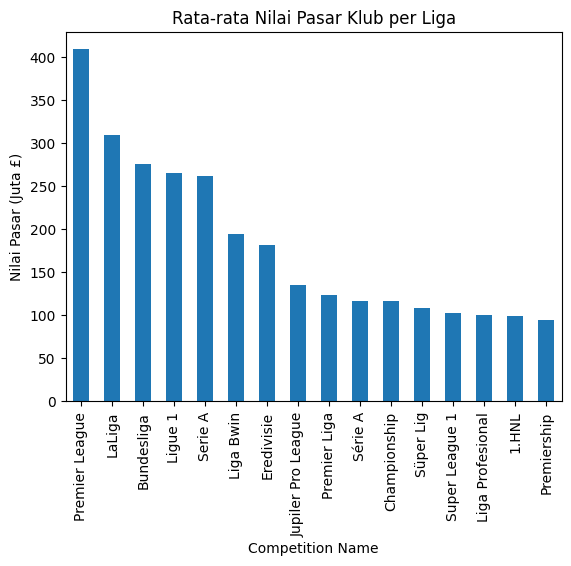

In [39]:
league_avg = df.groupby('Competition Name')['Market Value Of Club In Millions(£)'].mean()

league_avg.sort_values(ascending=False).plot(kind='bar')
plt.title("Rata-rata Nilai Pasar Klub per Liga")
plt.ylabel("Nilai Pasar (Juta £)")
plt.show()

# Grafik menunjukkan perbedaan rata-rata nilai pasar klub antar liga

In [31]:
df[['Club Name', 'Market Value Of Club In Millions(£)']].sort_values('Market Value Of Club In Millions(£)', ascending=False).head(1)

# Klub dengan nilai pasar tertinggi berada di peringkat pertama hasil sorting.

,Club Name,Market Value Of Club In Millions(£)
0,Manchester City,970.02


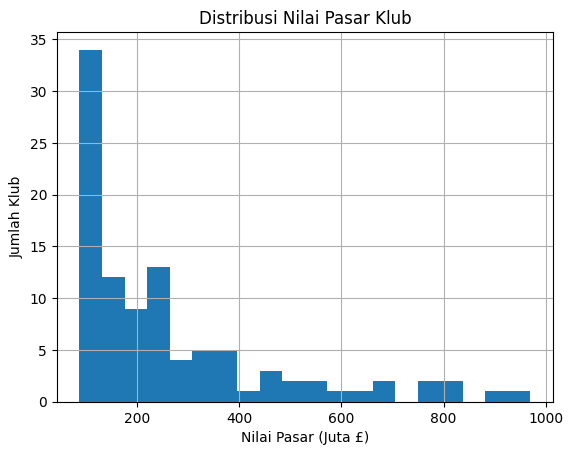

In [32]:
df['Market Value Of Club In Millions(£)'].hist(bins=20)
plt.title("Distribusi Nilai Pasar Klub")
plt.xlabel("Nilai Pasar (Juta £)")
plt.ylabel("Jumlah Klub")
plt.show()

# Sebagian besar klub berada pada nilai pasar menengah.

In [33]:
Q1 = df['Market Value Of Club In Millions(£)'].quantile(0.25)
Q3 = df['Market Value Of Club In Millions(£)'].quantile(0.75)
IQR = Q3 - Q1

outlier = df[
    (df['Market Value Of Club In Millions(£)'] < Q1 - 1.5 * IQR) |
    (df['Market Value Of Club In Millions(£)'] > Q3 + 1.5 * IQR)
]

outlier[['Club Name', 'Market Value Of Club In Millions(£)']]

# Outlier menunjukkan klub dengan nilai pasar yang sangat tinggi.

,Club Name,Market Value Of Club In Millions(£)
0,Manchester City,970.02
1,Paris Saint-Germain,891.18
2,Manchester United,820.13
3,Chelsea FC,802.35
4,Liverpool FC,779.85
5,Bayern Munich,756.45


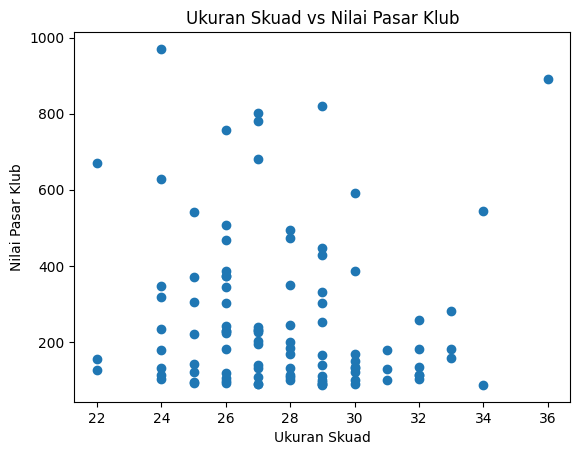

In [34]:
plt.scatter(
    df['Squad Size'],
    df['Market Value Of Club In Millions(£)']
)
plt.xlabel("Ukuran Skuad")
plt.ylabel("Nilai Pasar Klub")
plt.title("Ukuran Skuad vs Nilai Pasar Klub")
plt.show()

# Klub dengan usia pemain lebih muda cenderung memiliki nilai pasar lebih tinggi.

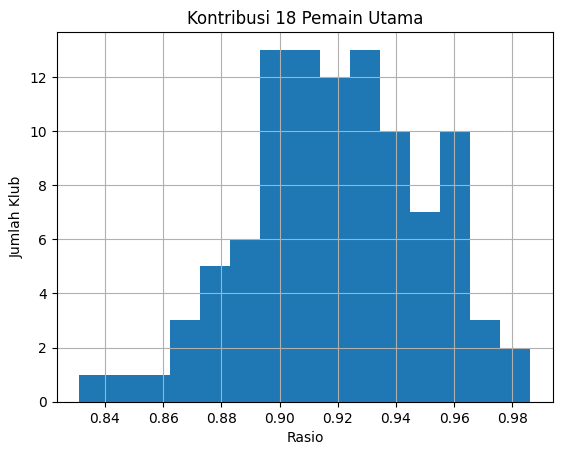

In [35]:
ratio = df['Market Value Of Top 18 Players In Millions(£)'] / df['Market Value Of Club In Millions(£)']

ratio.hist(bins=15)
plt.title("Kontribusi 18 Pemain Utama")
plt.xlabel("Rasio")
plt.ylabel("Jumlah Klub")
plt.show()

# Nilai pasar klub sebagian besar berasal dari pemain inti.

# Kesimpulan
Berdasarkan hasil analisis, dapat disimpulkan bahwa terdapat perbedaan nilai pasar klub sepak bola antar liga, di mana Premier League memiliki rata-rata nilai pasar tertinggi. 
Distribusi nilai pasar menunjukkan adanya kesenjangan antara klub-klub besar dan klub lainnya yang terlihat dari keberadaan outlier. 
Ukuran skuad tidak menunjukkan pengaruh yang signifikan terhadap nilai pasar klub, sedangkan usia rata-rata pemain dan kontribusi pemain inti cenderung berkaitan dengan tingginya nilai pasar klub.